# Figure 2

The following code can be used to reproduce Figure 2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from tslearn.metrics import dtw_path
from dtw_gi import dtw_gi
from dtw_gi import stiefel_uniform_npy

from utils import plot_trajectory, set_fig_style, make_one_folium, get_rot2d

torch.manual_seed(0)

# Data generation
trajectory = make_one_folium(sz=30).dot(get_rot2d(np.pi / 3))
rotated_trajectory = trajectory.dot(get_rot2d(np.pi))

# DTW
pi_dtw, _ = dtw_path(trajectory, rotated_trajectory)

# DTW-GI
p = stiefel_uniform_npy((2, 2))
pi_dtw_gi, _, _ = dtw_gi(trajectory, rotated_trajectory, max_iter=5000,
                         init_p=p, use_bias=False)

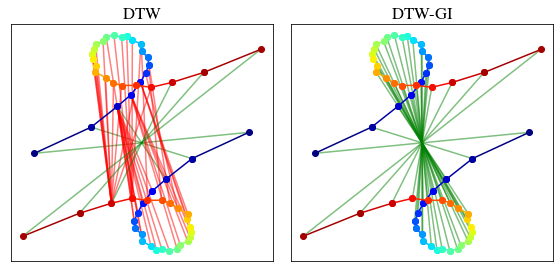

In [2]:
# Generate figure with matches based on optimal $\pi$ for each method
# Since series are similar up to a rotation, diagonal matches are expected
set_fig_style(font_size=14)

base_shift = np.array([0., 3.])
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
for (i, j) in pi_dtw:
    ax.plot([trajectory[i, 0], rotated_trajectory[j, 0] + base_shift[0]],
            [trajectory[i, 1], rotated_trajectory[j, 1] + base_shift[1]],
            color='g' if i == j else 'r', alpha=.5)
plot_trajectory(trajectory, ax)
plot_trajectory(rotated_trajectory + base_shift, ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("DTW")

ax = plt.subplot(1, 2, 2)
for (i, j) in pi_dtw_gi:
    ax.plot([trajectory[i, 0], rotated_trajectory[j, 0] + base_shift[0]],
            [trajectory[i, 1], rotated_trajectory[j, 1] + base_shift[1]],
            color='g' if i == j else 'r', alpha=.5)
plot_trajectory(trajectory, ax)
plot_trajectory(rotated_trajectory + base_shift, ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("DTW-GI")

plt.tight_layout()